# Step 2: Data Storing

In [2]:
import h5py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def windowSegmenting(df):
    """Transforms DataFrame and segments data into 5 second windows"""
    # Select the z acceleration data
    df = df.iloc[:, 3]
    # Drop the label row and transform DataFrame into a list
    values = df.iloc[1:].tolist()

    # List will be returned with the segmented data
    segmentList = []

    # Loops through in intervals equivalent to 5 seconds, segmenting the
    # data and appending to return list
    for i in range(0,len(values), 500):
        segmentList.append(values[i:i+500])

    return segmentList

def shuffle(list):
    """Function utilizes np.random.shuffle to shuffle the list of data segments"""
    # Shuffle
    np.random.shuffle(list)
    return list

# Read in raw data file with pandas function
elizabethDf = pd.read_csv(r"ConnorData.csv")
connorDf = pd.read_csv(r"ElizabethData.csv")

# Segment Elizabeth's Data into the appropriate amount of windows
elizabethSegment = windowSegmenting(elizabethDf)
# Shuffle the segmented windows
elizabethSegment = shuffle(elizabethSegment)

# Segment Connor's Data into the appropriate amount of windows
connorSegment = windowSegmenting(connorDf)
# Shuffle the segmented windows
connorSegment = shuffle(connorSegment)

# Transform both segment lists into a DataFrames
elizabethSegment = [pd.DataFrame(value) for value in elizabethSegment]
connorSegment = [pd.DataFrame(value) for value in connorSegment]
# Combine DataFrames
totalSegment = elizabethSegment + connorSegment
# Put into on data frame with concat
dataframe = pd.concat(totalSegment)
# Shuffle combined DataFrames
shuffle(totalSegment)

# Split the DataFrame into 10% for test and 90% for train
dfTrain, dfTest = train_test_split(dataframe, test_size=0.1, shuffle=False, random_state=42)

# Step 3: Visualization

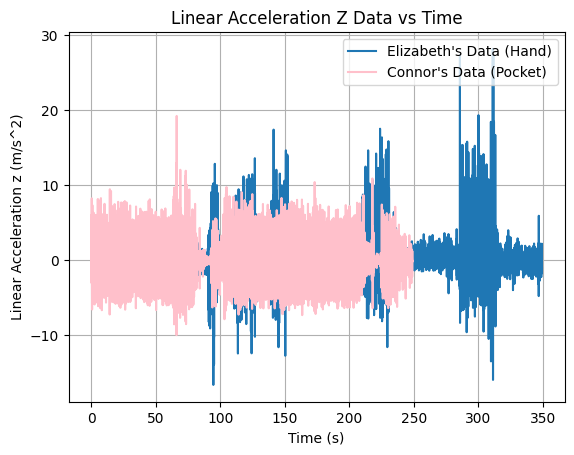

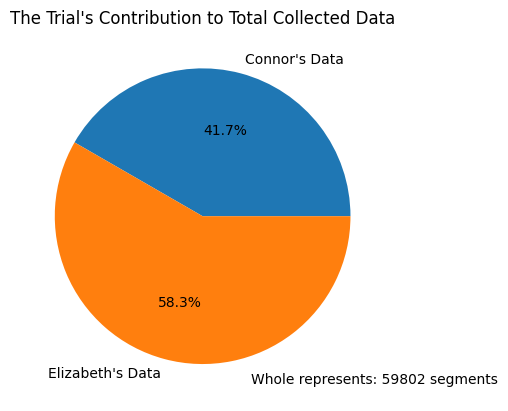

In [3]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd

# Data plot
# Create the X axis (Time) for the length that Connor jumped
dfConnor = pd.read_csv(r"ConnorData.csv")
xFirstAxis = dfConnor["Time (s)"]

# Create the X axis (Time) for the length of time Elizabeth jumped
dfElizabeth = pd.read_csv(r"ElizabethData.csv")
xSecondAxis = dfElizabeth["Time (s)"]

# Plot each team member's data with respect to the length of time they collected data for
plt.plot(xSecondAxis, dfElizabeth["Linear Acceleration z (m/s^2)"], label = "Elizabeth's Data (Hand)")
plt.plot(xFirstAxis, dfConnor['Linear Acceleration z (m/s^2)'], label = "Connor's Data (Pocket)", color = "pink")

# Axis labels
plt.xlabel("Time (s)")
plt.ylabel("Linear Acceleration z (m/s^2)")

# Legend placement
plt.legend(loc = "upper right")
# Title and grid
plt.title("Linear Acceleration Z Data vs Time")
plt.grid(True)
plt.show()

# Meta-Data plot
# Calculate the amount of data in each member's data frames and the total size of the data frame
sizes = [len(dfConnor), len(dfElizabeth)]
total = sum(sizes)

# Labels and title
labels = ["Connor's Data", "Elizabeth's Data"]
plt.title("The Trial's Contribution to Total Collected Data")

# Plot the amount of data each team member contributed
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Display the total amount of data collected
plt.text(2, -1.15, f'Whole represents: {total} segments', ha='right', va = 'bottom' )

plt.show()


# Step 4: Pre-Processing

In [4]:
import DataStoring as ds
from sklearn.preprocessing import StandardScaler

windowSize = 5
filteredDataset = ds.dataframe.rolling(window=windowSize).mean()

scaler = StandardScaler()

dfNormalized = scaler.fit_transform(ds.dataframe)


# Step 5: Feature Extraction and Normailzation

In [5]:
# extract min 10 diff features
import pandas as pd
import numpy as np
import h5py

with h5py.File('finalDataset.h5', 'r') as hf:
    data = hf['dataset/Train/trainData'][:]

dataset = pd.DataFrame(data)

features = pd.DataFrame(columns=['max', 'min', 'mean', 'median', 'range', 'variance', 'std', 'z-score', 'kurtosis', 'skewness'])
features['mean'] = dataset.mean()
features['std'] = dataset.std()
features['max'] = dataset.max()
features['min'] = dataset.min()
features['median'] = dataset.median()
features['range'] = features['max'] - features['min']
features['variance'] = dataset.var()
features['z-score'] = (dataset - features['mean']) / features['std']
features['kurtosis'] = dataset.kurt()
features['skewness'] = dataset.skew()

print(features)

newDataPrime = dataset - features['mean']
newDataBar = newDataPrime / features['std']

dataset = pd.DataFrame(newDataBar)

features['mean'] = dataset.mean()
features['std'] = dataset.std()
features['max'] = dataset.max()
features['min'] = dataset.min()
features['median'] = dataset.median()
features['range'] = features['max'] - features['min']
features['variance'] = dataset.var()
features['z-score'] = (dataset - features['mean']) / features['std']
features['kurtosis'] = dataset.kurt()
features['skewness'] = dataset.skew()

print(features)


         max       min      mean    median      range  variance       std  \
0  28.177725 -16.58609  0.108402 -0.015963  44.763816  7.419177  2.723817   

    z-score  kurtosis  skewness  
0 -0.049686   5.14286   0.80882  
         max       min          mean    median      range  variance  std  \
0  10.305144 -6.129081 -2.482015e-17 -0.045658  16.434225       1.0  1.0   

    z-score  kurtosis  skewness  
0 -0.049686   5.14286   0.80882  


# Step 6: Classifier Creation

Y_Pred=array([0, 0, 1, ..., 0, 0, 1])
Y_test.to_numpy()=array([0, 0, 1, ..., 0, 0, 1])
model_accuracy=1.0


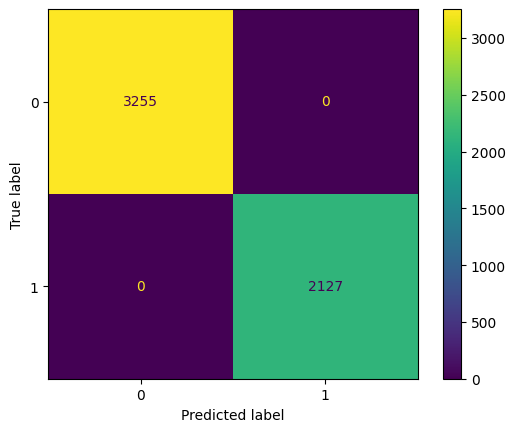

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


f1_score=1.0


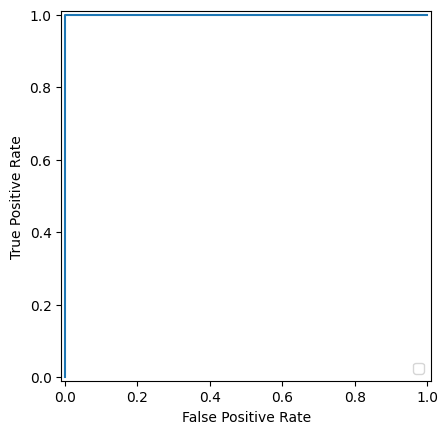

roc_auc=1.0


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

with h5py.File('finalDataset.h5', 'r') as f:
    trainData = f['dataset/Train/trainData'][:]

trainData = pd.DataFrame(trainData)


# jumping = 1, walking = 0
# jumping if position > 1.5 or position < -1.5
trainData[0] = trainData[0].apply(lambda x: 1 if x < -1.5 or x > 1.5 else 0 )

labels = trainData[0]

X_train, X_test, Y_train, Y_test = train_test_split(
    trainData, labels, test_size=0.1, random_state=42, shuffle=True)

l_reg = LogisticRegression(max_iter=10001)
clf = make_pipeline(StandardScaler(), l_reg)

# Training.
clf.fit(X_train, Y_train)

# Testing.
Y_Pred = clf.predict(X_test)
Y_clf_prob = clf.predict_proba(X_test)

# printing out the predicted vs actual values
print(f"{Y_Pred=}")
print(f"{Y_test.to_numpy()=}")

# Accuracy.
model_accuracy = accuracy_score(Y_test, Y_Pred)
print(f"{model_accuracy=}")
model_recall = recall_score(Y_test, Y_Pred)

# Confusion Matrix.
cm = confusion_matrix(Y_test, Y_Pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

# F1 Score.
f1_score = 2 * (model_accuracy * model_recall) / \
    (model_accuracy + model_recall)
print(f"{f1_score=}")

# ROC Curve and AUC.
fpr, tpr, thresholds = roc_curve(
    Y_test, Y_clf_prob[:, 1], pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()
roc_auc = roc_auc_score(Y_test, Y_clf_prob[:, 1])
print(f"{roc_auc=}")



In [7]:
# # Initliaizing classes
# std_scaler = StandardScaler()
# l_reg = LogisticRegression(max_iter=10000)
# pca = PCA(n_components=2)

# # Step 2. Pipeline creation
# pca_pipe = make_pipeline(std_scaler, pca)

# # Step 3. Apply pipline over x_train and x_test, x_test_pca
# X_train_pca = pca_pipe.fit_transform(X_train)
# X_test_pca =  pca_pipe.transform(X_test)

# # Step 4. Logistic Regression Pipeline
# clf = make_pipeline(std_scaler, l_reg)

# # Step 5. Training clf
# clf.fit(X_train_pca, Y_train)

# # Step 6. Obtaining predictions for X_test_pca
# y_pred_pca = clf.predict(X_test_pca)

# # Step 7. creating decision boundary
# disp = DecisionBoundaryDisplay.from_estimator( 
#    clf, X_train_pca, response_method="predict", 
#     xlabel='X1', ylabel='X2', 
#     alpha=0.5, 
# )

# # Step 8. Plotting and Accuracy
# disp.ax_.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train)
# plt.show()

# acc = accuracy_score(Y_test, y_pred_pca)
# print("model accuracy = ", acc)